# TP 6 : Programmation et complexité

## 1. Un tri simple : le tri à bulle

1. Dans un premier temps, écrivez une fonction `echange` qui réalise l'échange de deux éléments adjacents: l'élément d'indice $i$ et celui d'indice $i+1$. Sur une liste `L=[5, 9, 17, 18, 3, 2, 14, 8, 19, 13, 10]` la fonction `echange(L,4)` retourne `[5, 9, 17, 18, 2, 3, 14, 8, 19, 13, 10]`.

In [1]:
from sympy import *
init_printing()
%matplotlib inline
import timeit
from functools import partial
import matplotlib.pyplot as plt
from random import randint
import numpy as np

In [2]:
def echange(L,x):
    L[x],L[x+1] = L[x+1],L[x]
    return L

In [3]:
L=[5, 9, 17, 18, 3, 2, 14, 8, 19, 13, 10]
echange(L,4)

2. Dans un deuxième temps implémentez le tri par bulle (triBulle) qui répète l'échange de deux éléments adjacents. Cet échange est répété autant de fois que la longueur de la liste (moins le nombre d'éléments qui ont été rangé à la bonne place, soit 1 par itération)

In [4]:
def triBulle(L):
    n = len(L)
    for i in range(n-1):
        for j in range (n-1-i):
            if L[j] > L[j+1]:
                echange(L,j)
            print("i=",i,"j=",j,":",L)

In [5]:
L=[6,3,4,2,5,1]
triBulle(L)

i= 0 j= 0 : [3, 6, 4, 2, 5, 1]
i= 0 j= 1 : [3, 4, 6, 2, 5, 1]
i= 0 j= 2 : [3, 4, 2, 6, 5, 1]
i= 0 j= 3 : [3, 4, 2, 5, 6, 1]
i= 0 j= 4 : [3, 4, 2, 5, 1, 6]
i= 1 j= 0 : [3, 4, 2, 5, 1, 6]
i= 1 j= 1 : [3, 2, 4, 5, 1, 6]
i= 1 j= 2 : [3, 2, 4, 5, 1, 6]
i= 1 j= 3 : [3, 2, 4, 1, 5, 6]
i= 2 j= 0 : [2, 3, 4, 1, 5, 6]
i= 2 j= 1 : [2, 3, 4, 1, 5, 6]
i= 2 j= 2 : [2, 3, 1, 4, 5, 6]
i= 3 j= 0 : [2, 3, 1, 4, 5, 6]
i= 3 j= 1 : [2, 1, 3, 4, 5, 6]
i= 4 j= 0 : [1, 2, 3, 4, 5, 6]


3. Montrez expérimentalement que la complexité du tri à bulle est quadratique et trouvez les coefficients du polynôme de degré 2 qui correspond.

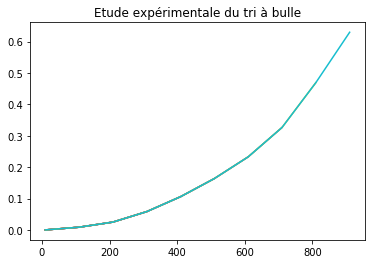

In [6]:
def triBulle1(L):
    for i in range(len(L)-1):
        for j in range(len(L)-i-1):
            if L[j] > L[j+1]:
                echange(L,j)
    return L


def listeAlea(n,max):
    return [randint(1,max) for i in range(n)]

x,y=[],[]
for i in range(10,1000,100):
    t=timeit.Timer(partial(triBulle1,listeAlea(i,1000)))
    t=t.timeit(10)
    x.append(i)
    y.append(t)
    plt.plot(x,y)
    plt.title('Etude expérimentale du tri à bulle')

In [8]:
#les coefficients du polynôme de degré 2 sont de :
coefficient=np.polyfit(x,y,2)
poly=np.poly1d(coefficient)
print(poly)

           2
9.204e-07 x - 0.0001818 x + 0.01488


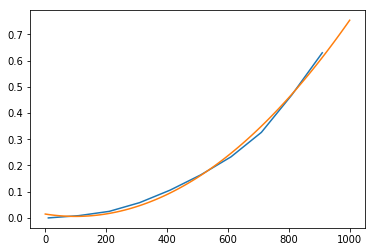

In [9]:
xs=np.linspace(0,1000,100)
ys=poly(xs)
plt.plot(x,y)
plt.plot(xs,ys)

In [10]:
#Graphiquement on observe bien que la compléxité de la fonction tri à bulle est quadratique O(n²).

## 2. Comparaison des algorithmes de tri

Le cours a rappelé le tri rapide, vous avez programmé le tri à bulle et `Python` implémente une fonction de tri (`sort`, déjà utilisée en TP). Sur un même jeu de données, comparez graphiquement la complexité de ces trois tris et essayez, pour chacun d'entre eux, de trouver une fonction d'approximation de la complexité.

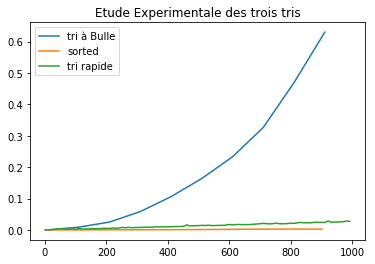

In [16]:
def quicksort(L):
    if L==[] : return []
    else :
        p=L[0]
        L1 = [x for x in L[1:] if x<p]
        L2 = [x for x in L[1:] if x>=p]
        LT1=quicksort(L1)
        LT2=quicksort(L2)
        return LT1 + [p] +LT2

#Courbe du tri d'une liste aleatoire
x2,y2=[],[]
for i in range(1,1000,100):
    testTimer=timeit.Timer(partial(sorted,listeAlea(i,1000)))
    t2=testTimer.timeit(number=10)
    x2.append(i)
    y2.append(t2)

#Courbe du tri rapide d'une liste aléatoire
x3,y3=[],[]
for i in range(1,1000,10):
    testTimer=timeit.Timer(partial(quicksort,listeAlea(i,1000)))
    t3=testTimer.timeit(number=10)
    x3.append(i)
    y3.append(t3)


plt.plot(x,y,label="tri à Bulle")
plt.plot(x2,y2,label="sorted")
plt.plot(x3,y3,label="tri rapide")
plt.title('Etude Experimentale des trois tris')
plt.legend()

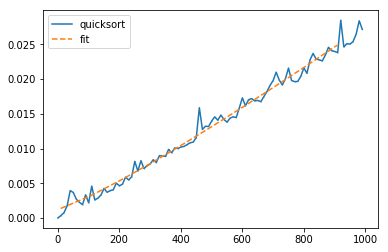

 
3.804e-06 x + 0.001297


In [17]:
coefs=np.polyfit(x3*np.log(x3),y3,1)
fit=np.poly1d(coefs)
plt.plot(x3,y3,marker='.',markersize=0.2,label="quicksort")
plt.plot(x,fit(x*np.log(x)),'--',label='fit')
plt.legend()
plt.show()
print(fit)

In [18]:
#une fonction d'aproximation du quicksort en remplaçant x par xlog(x) est de : 3.925e-06 x*log(x) + 0.0007208

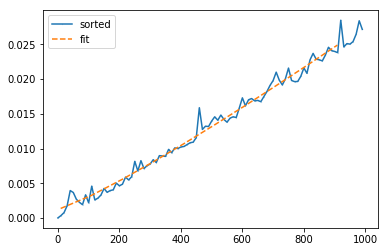

 
4.765e-07 x - 0.0001271


In [19]:
coefs=np.polyfit(x2*np.log(x2),y2,1)
fit1=np.poly1d(coefs)
plt.plot(x3,y3,marker='.',markersize=0.2,label="sorted")
plt.plot(x,fit(x*np.log(x)),'--',label='fit')
plt.legend()
plt.show()
print(fit1)

In [20]:
#une fonction d'aproximation du sorted  en remplaçant x par xlog(x) est de : 4.103e-07 x*log(x) - 6.866e-05

In [21]:
#CONCLUSION :

#Compléxité du Tri d'une liste aléatoire est de O(nlog(n))
#Compléxité du Tri rapide d'une liste aléatoire est de O(nlog(n))
#Compléxité du Tri à bulle d'une liste est de O(n²) 

## 3. Décider si une liste est triée

1. Pour utiliser la recherche dichotomique, il est nécessaire d'avoir une liste triée. Écrivez la fonction `estTrie` qui renvoie`True` si la liste fournie en entrée est triée et `False` sinon.

In [22]:
def est_trie(L):
    compte = 0
    n = len(L)
    for i in range (n-1):
        if L[i]< L[i+1]:
            compte = compte + 1
            if compte == n-1:
                return True
    return False

L=[1,3,2,4,6,5]
est_trie(L)

False

2. Améliorez la fonction de recherche dichotomique pour qu'elle teste au préalable si la liste fournie en entrée est triée ou non. Si elle ne l'est pas, triez-la par la fonction de tri la plus efficace.

In [23]:
def recherche_dichotomique(x,L):
    a = 0
    b = len(L)-1
    m = (a+b)//2
    while a < b :
        if L[m] == x:
            return m
        elif L[m] > x :
            b = m-1
        else :
            a = m+1
        m = (a+b)//2
    return a

def amelior_dicho(e,T):
    if est_trie(T):
        return recherche_dichotomique(e,T)
    else:
        T1 = sorted(T)
        return recherche_dichotomique(e,T1)

In [ ]:
#Question 3 :
#Pensez-vous qu'il est intéressant (du point de vue de la complexité en temps) 
#de tester si la liste est triée avant de faire une recherche dichotomique? 
#(vérifiez les complexité avec et sans décider si la liste est triée).

In [ ]:
# Oui il est intéressant du point de vue de la complexité de tester si la liste est triée avant de faire une recherche dicho:
# En effet le faite d'avoir une liste triée permet faire une recherche dichotomique bien plus rapidement que dans le cas ou 
# la liste n'est pas triée : lorsque la liste est triée on parle d'une compléxité de l'odre de O(log(n)) 
# et lorsque celle-ci n'est triée ça compléxité peut aller jusqu'a O(n²) (si cette liste est triée dans l'ordre inverse)

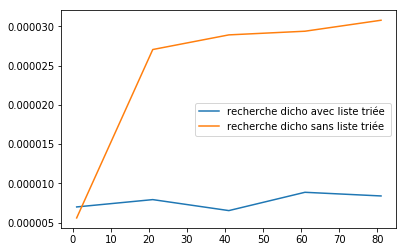

In [86]:
xavec,yavec=[],[]
L2 = []
for i in range(1,100,20):
    L2.append(i)
    testTimer=timeit.Timer(partial(recherche_dichotomique,i,L2))
    tavec=testTimer.timeit(number=10)
    xavec.append(i)
    yavec.append(tavec)
    
xsans,ysans=[],[]
for i in range(1,100,20):
    testTimer=timeit.Timer(partial(recherche_dichotomique,i,listeAlea(i,1000)))
    tsans=testTimer.timeit(number=10)
    xsans.append(i)
    ysans.append(tsans)
    
plt.plot(xavec,yavec,label="recherche dicho avec liste triée")
plt.plot(xsans,ysans,label="recherche dicho sans liste triée ")
plt.legend()
plt.show()

## 4. Complexité de la recherche dichotomique

1. Vérifiez expérimentalement que la complexité de la recherche dichotomique (dans une liste triée) est logarithmique. On rappelle que cette complexité est maximale lorsqu'on cherche un élément qui n'est pas dans la liste.

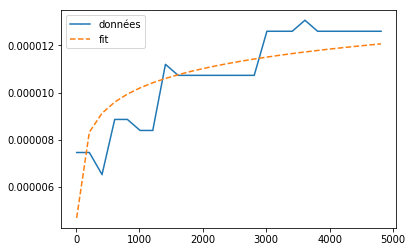

In [84]:
x,y=[],[]
L2 = []
for i in range(10,5000,200):
    L2.append(i)
    testTimer=timeit.Timer(partial(recherche_dichotomique,i,L2))
    t=testTimer.timeit(number=10)
    x.append(i)
    y.append(t)

import numpy as np
coefs=np.polyfit(np.log(x),y,1)
fit=np.poly1d(coefs)
plt.plot(x,y,marker='.',markersize=0.2,label="données")
plt.plot(x,fit(np.log(x)),'--',label='fit')
plt.legend()
plt.show()

In [ ]:
#La courbe a bien une tendance logarithmique 